In [1]:
# A brief about problem statement

In [ ]:
'''
Given the feature:
Column Description
longitude Longitude value for the block in California, USA
latitude: Latitude value for the block in California, USA
housing_median_age: Median age of the house in the block
total_rooms Count of the total number of rooms (excluding bedrooms) in all houses in the block
total_bedrooms: Count of the total number of bedrooms in all houses in the block
population: Count of the total number of population in the block
households: Count of the total number of households in the block
median_income: Median of the total household income of all the houses in the block
ocean_proximity: Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ] 1o.median_house_value: Median of the household prices of all the houses in the block
'''

In [ ]:
# Importing required libraries

In [12]:
#Load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [ ]:
# Loading dataset

In [2]:
data=pd.read_csv("C://Users//acer//Desktop//1sem//python//House cal//housing.csv")

In [ ]:
# looking at first few rows

In [3]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
# Last few rows

In [4]:
data.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [ ]:
# shape of dataset

In [5]:
data.shape

(20640, 10)

In [ ]:
# Info of dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
# Basic stats value

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# detailed summary of dataset

In [8]:
pd.DataFrame({"TotalMissing":data.isna().sum(),"%Missing":data.isna().mean(),"DataType":data.dtypes,"Unique":data.nunique()})

,TotalMissing,%Missing,DataType,Unique
longitude,0,0.000000,float64,844
latitude,0,0.000000,float64,862
housing_median_age,0,0.000000,int64,52
total_rooms,0,0.000000,int64,5926
total_bedrooms,207,0.010029,float64,1923
population,0,0.000000,int64,3888
households,0,0.000000,int64,1815
median_income,0,0.000000,float64,12928
ocean_proximity,0,0.000000,object,5
median_house_value,0,0.000000,int64,3842


In [ ]:
# Missing value imputation

In [9]:
data.fillna(data.mean(),inplace=True)

In [ ]:
# Categorical variable

In [10]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

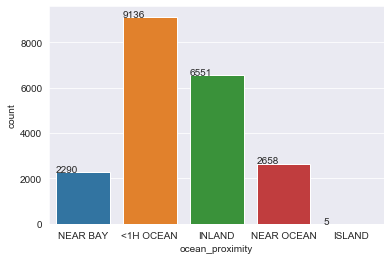

In [22]:
fig=sns.countplot(x="ocean_proximity",data=data)
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
plt.savefig("House-count.png")

In [ ]:
# Box plot

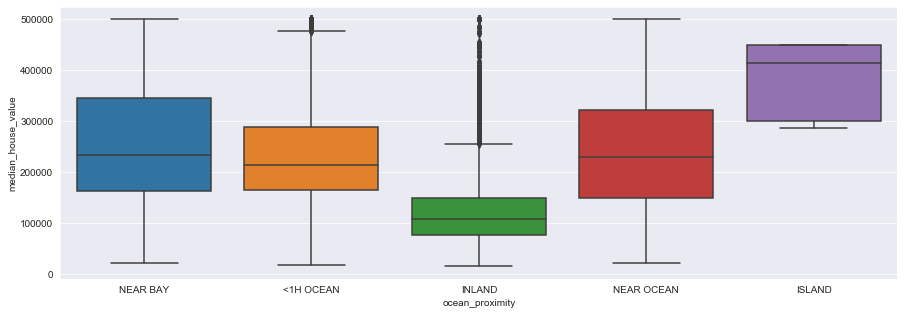

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(data.ocean_proximity,data.median_house_value)
plt.savefig("House-box.png")

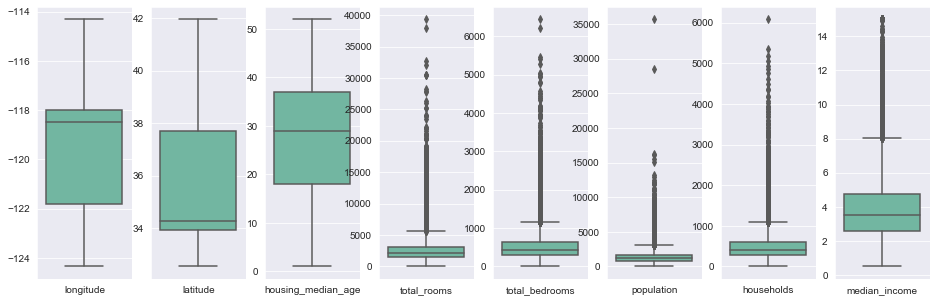

In [25]:
fig, axes = plt.subplots(ncols=8, figsize=(16, 5))

sns.boxplot(data=data[['longitude']],  palette='Set2', ax=axes[0]);
sns.boxplot(data=data[['latitude']]  ,  palette='Set2', ax=axes[1]);
sns.boxplot(data=data[['housing_median_age']], palette='Set2', ax=axes[2]);
sns.boxplot(data=data[['total_rooms']],  palette='Set2', ax=axes[3]);

sns.boxplot(data=data[['total_bedrooms']],   palette='Set2', ax=axes[4]);
sns.boxplot(data=data[['population']]  ,  palette='Set2', ax=axes[5]);
sns.boxplot(data=data[['households']],   palette='Set2', ax=axes[6]);
sns.boxplot(data=data[['median_income']],   palette='Set2', ax=axes[7]);

In [26]:
corr=data.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


In [ ]:
#here medium_income and median_house_value are highly correlated

In [27]:
corr.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

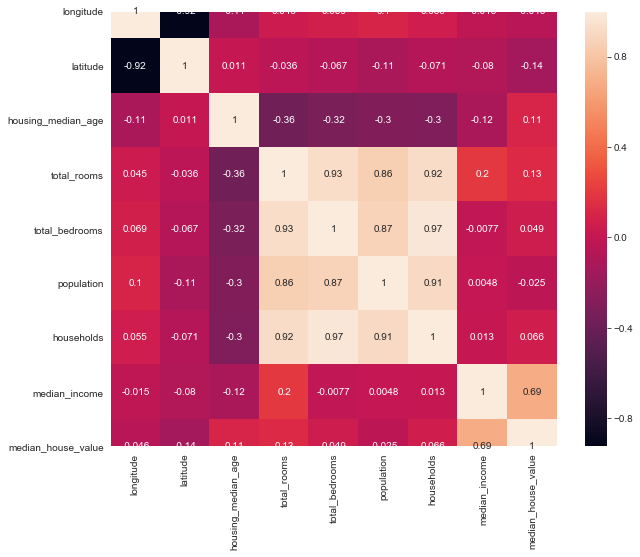

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [29]:
data = pd.concat([data,pd.get_dummies(data.ocean_proximity)],axis=1)
data.drop(['ocean_proximity'],axis=1,inplace=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [30]:
#standardized the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [36]:
X=data.drop(['median_house_value'],axis=1).values

In [33]:
y=data.iloc[:,8].values.reshape(-1,1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [38]:
#linear regressor
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
model1.intercept_

array([-2242342.60923956])

In [40]:
model1.coef_

array([[-2.66812083e+04, -2.51966701e+04,  1.07320102e+03,
        -6.21238891e+00,  8.71204511e+01, -3.70696959e+01,
         6.17688179e+01,  3.97629971e+04, -2.39232098e+04,
        -6.29232946e+04,  1.31669210e+05, -2.68434838e+04,
        -1.79792214e+04]])

In [41]:
feature_cols = data.drop(['median_house_value'], axis=1).columns
feature_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [42]:
y_pred = model1.predict(X_test)

In [43]:
from sklearn import metrics
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  50029.66323305267
Mean Sq  Error MSE      :  4776927832.090292
Root Mean Sq Error RMSE :  69115.32270119479
r2 value                :  0.6366479562027032


In [44]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
model2 =  DecisionTreeRegressor(random_state=0)
model2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [45]:
y_pred2 = model2.predict(X_test)

In [46]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred2))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred2))

Mean Abs Error   MAE    :  44171.61773255814
Mean Sq  Error MSE      :  4890700266.772771
Root Mean Sq Error RMSE :  69933.54178627572
r2 value                :  0.6279939743711241


In [47]:
#Random Forest Regression
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [48]:
clf.feature_importances_

array([1.17744876e-01, 1.15450938e-01, 1.07290768e-01, 1.25660652e-01,
       1.22668408e-01, 1.26891779e-01, 1.20599505e-01, 1.44578090e-01,
       6.33441510e-03, 3.10626890e-03, 1.25887030e-04, 3.74140151e-03,
       5.80701179e-03])

In [49]:
list(zip(feature_cols, clf.feature_importances_))

[('longitude', 0.11774487561127248),
 ('latitude', 0.11545093770798383),
 ('housing_median_age', 0.10729076761452644),
 ('total_rooms', 0.12566065234986543),
 ('total_bedrooms', 0.12266840806210888),
 ('population', 0.1268917786277962),
 ('households', 0.12059950532001405),
 ('median_income', 0.14457809037708783),
 ('<1H OCEAN', 0.006334415102624041),
 ('INLAND', 0.003106268898831408),
 ('ISLAND', 0.00012588702992859818),
 ('NEAR BAY', 0.0037414015050336886),
 ('NEAR OCEAN', 0.005807011792927298)]

In [50]:
y_pred3 = clf.predict(X_test)

In [51]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred3))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred3))

Mean Abs Error   MAE    :  57535.02551679587
Mean Sq  Error MSE      :  7396011795.91053
Root Mean Sq Error RMSE :  86000.06858084783
r2 value                :  0.43743006039572674


In [52]:
# with one independent variable
X1=data.iloc[:,7].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=1, test_size=0.3)
model4 = LinearRegression()
model4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred4 =model4.predict(X_test)

In [54]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred4))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred4))

Mean Abs Error   MAE    :  62702.77088531161
Mean Sq  Error MSE      :  6999091760.117259
Root Mean Sq Error RMSE :  83660.57470587481
r2 value                :  0.46762136981027


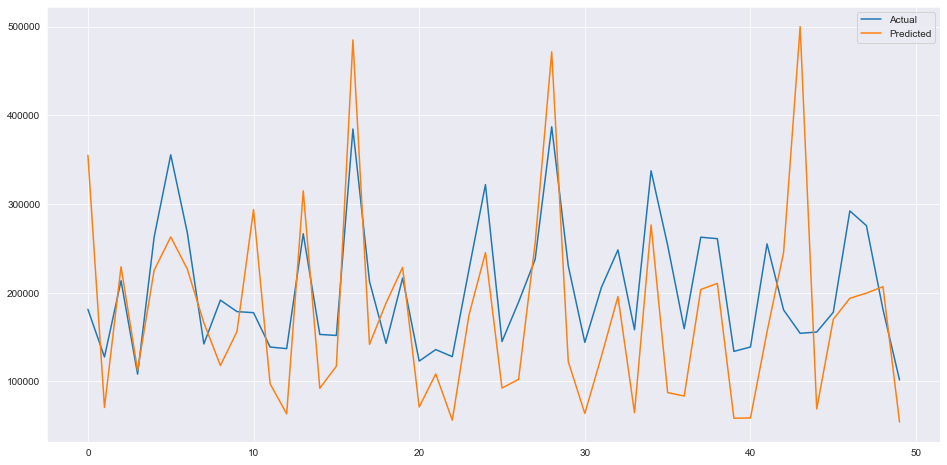

In [55]:
test = pd.DataFrame({'Predicted':list(y_pred4),'Actual':list(y_test)})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

In [ ]:
# Inference: 1st model  is the best model with r2 =0.63

In [ ]:
# Thank you